#Mini project : Fruit Classification

## เตรียมข้อมูล (Preparing Data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Fruits-dataset"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Fruits-dataset'.
There are 1 directories and 0 images in '/content/drive/MyDrive/Fruits-dataset/train'.
There are 7 directories and 0 images in '/content/drive/MyDrive/Fruits-dataset/train/train'.
There are 0 directories and 492 images in '/content/drive/MyDrive/Fruits-dataset/train/train/Lemon'.
There are 0 directories and 462 images in '/content/drive/MyDrive/Fruits-dataset/train/train/Blueberry'.
There are 0 directories and 492 images in '/content/drive/MyDrive/Fruits-dataset/train/train/Strawberry'.
There are 0 directories and 492 images in '/content/drive/MyDrive/Fruits-dataset/train/train/Cherry'.
There are 0 directories and 696 images in '/content/drive/MyDrive/Fruits-dataset/train/train/Pear'.
There are 0 directories and 450 images in '/content/drive/MyDrive/Fruits-dataset/train/train/Potato Red'.
There are 0 directories and 492 images in '/content/drive/MyDrive/Fruits-dataset/train/train/Apple Braeburn'.
There are

In [4]:
train_path = "/content/drive/MyDrive/Fruits-dataset/train/train/"
test_path = "/content/drive/MyDrive/Fruits-dataset/test/test/"

In [5]:
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Apple Braeburn' 'Blueberry' 'Cherry' 'Lemon' 'Pear' 'Potato Red'
 'Strawberry']


In [6]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 100)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

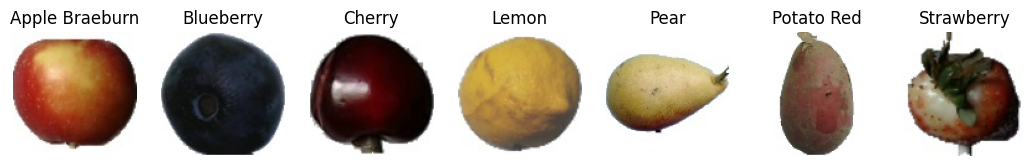

In [7]:
plt.figure(figsize = (15,10))
for i in range(7):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

In [8]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [9]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

,path,filename,label
0,/content/drive/MyDrive/Fruits-dataset/train/tr...,Lemon_319.jpg,Lemon
1,/content/drive/MyDrive/Fruits-dataset/train/tr...,Lemon_127.jpg,Lemon
2,/content/drive/MyDrive/Fruits-dataset/train/tr...,Lemon_484.jpg,Lemon
3,/content/drive/MyDrive/Fruits-dataset/train/tr...,Lemon_213.jpg,Lemon
4,/content/drive/MyDrive/Fruits-dataset/train/tr...,Lemon_308.jpg,Lemon


In [11]:
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [12]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename
0,/content/drive/MyDrive/Fruits-dataset/test/test/,2376.jpg
1,/content/drive/MyDrive/Fruits-dataset/test/test/,2095.jpg
2,/content/drive/MyDrive/Fruits-dataset/test/test/,2658.jpg
3,/content/drive/MyDrive/Fruits-dataset/test/test/,2681.jpg
4,/content/drive/MyDrive/Fruits-dataset/test/test/,2638.jpg


<ipython-input-14-b7141778eb71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_cntplot = sns.countplot(x='label', data=train_val_data_df, palette = "crest")


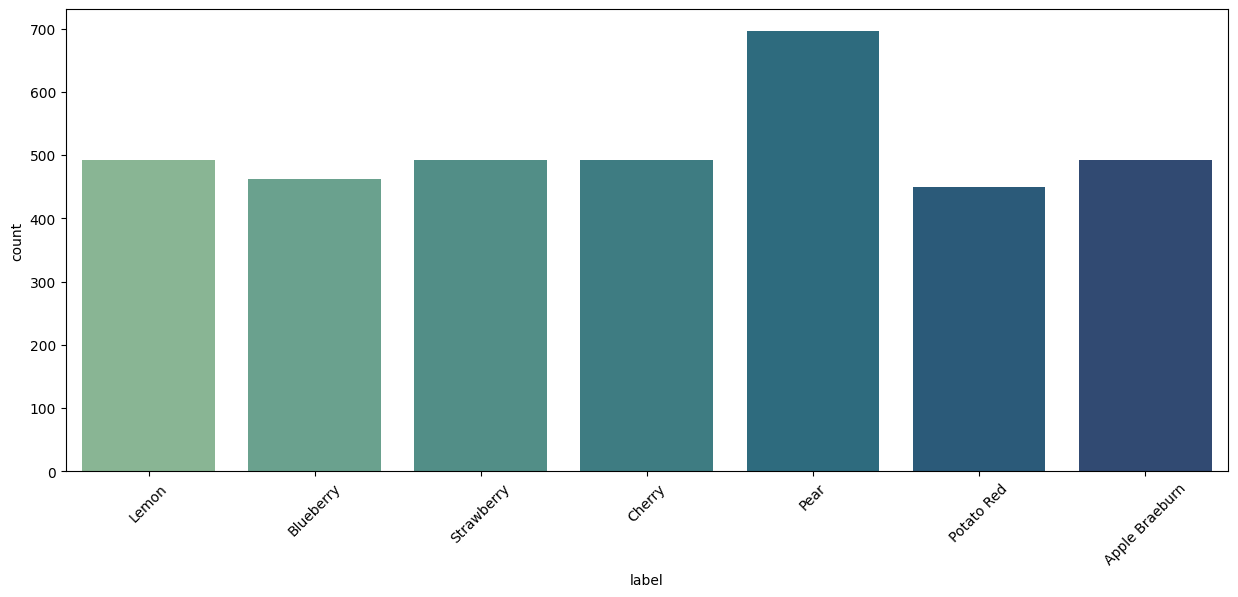

In [14]:
plt.figure(figsize = (15,6))
sns_cntplot = sns.countplot(x='label', data=train_val_data_df, palette = "crest")
plt.xticks(rotation=45);

In [15]:
images = []
label = []

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [16]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (3576, 100, 100, 3) and label shape: (3576,)


In [17]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))

test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (1788, 100, 100, 3) 


In [18]:
class_indices = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indices.get, labels))

label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names), dtype='uint8')

In [19]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20,
                                                            stratify=label_categorical,
                                                            random_state=40, shuffle = True)

In [20]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (2860, 100, 100, 3)
new validation data shape:  (716, 100, 100, 3)
validation labels shape:  (716, 7)


In [21]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [22]:
print (training_data.element_spec)
print (validation_data.element_spec)

train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(7,), dtype=tf.uint8, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(7,), dtype=tf.uint8, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0 0 1 0 0 0 0] 6


In [23]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (7,)


In [24]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(100, 100, 3) (7,)


In [25]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

2860 (array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [2

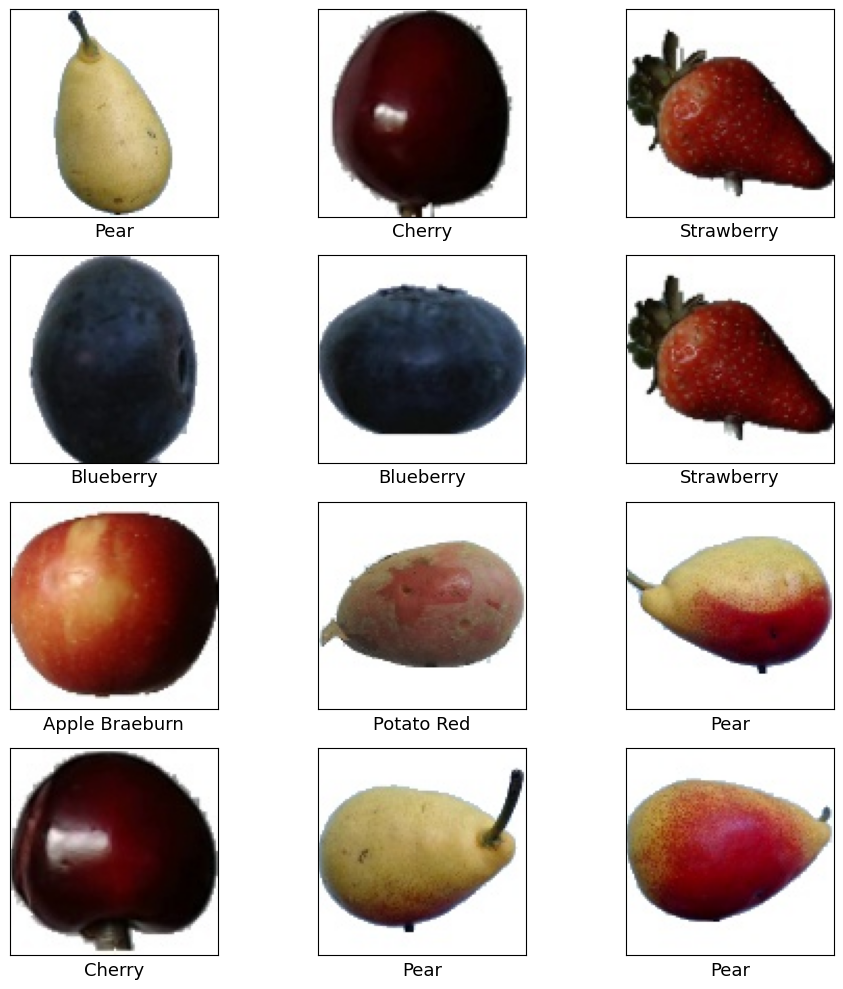

In [26]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()
plt.show()

In [27]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
])

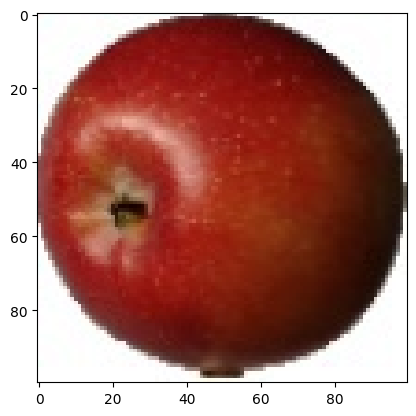

In [28]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [29]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

    ds = ds.batch(BATCH_SIZE)

    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

    return ds.prefetch(buffer_size=AUTOTUNE)

In [30]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

## เลือกโมเดล (Model Selection)

In [31]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5,
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [32]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 5)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12005)             0         
                                                                 
 dense (Dense)               (None, 7)                 84042     
                                                                 
Total params: 84182 (328.84 KB)
Trainable params: 84182 (328.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history_1 = model_1.fit(train_ds,
                       epochs =5,
                       validation_data= val_ds)

Epoch 1/5
23/23 [==============================] - 11s 459ms/step - loss: 0.6894 - accuracy: 0.7867 - val_loss: 0.1601 - val_accuracy: 0.9679
Epoch 2/5
23/23 [==============================] - 10s 451ms/step - loss: 0.0816 - accuracy: 0.9878 - val_loss: 0.0460 - val_accuracy: 0.9944
Epoch 3/5
23/23 [==============================] - 10s 427ms/step - loss: 0.0291 - accuracy: 0.9969 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 11s 467ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 9s 371ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.9986


In [91]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(100, 100, 3)),
    tf.keras.applications.InceptionV3(include_top=False, weights='imagenet'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 21817127 (83.23 MB)
Trainable params: 21782695 (83.09 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [36]:
history_2 = model_2.fit(train_ds,
                       epochs =5,
                       validation_data= val_ds)

Epoch 1/5
23/23 [==============================] - 278s 11s/step - loss: 0.2949 - accuracy: 0.9227 - val_loss: 40.4325 - val_accuracy: 0.1257
Epoch 2/5
23/23 [==============================] - 251s 11s/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 17.8072 - val_accuracy: 0.1508
Epoch 3/5
23/23 [==============================] - 257s 11s/step - loss: 0.0561 - accuracy: 0.9874 - val_loss: 245.9198 - val_accuracy: 0.1313
Epoch 4/5
23/23 [==============================] - 259s 11s/step - loss: 0.0129 - accuracy: 0.9972 - val_loss: 7.2549 - val_accuracy: 0.3045
Epoch 5/5
23/23 [==============================] - 258s 11s/step - loss: 0.0104 - accuracy: 0.9990 - val_loss: 6.8521 - val_accuracy: 0.5628


## ประเมินโมเดล (Model Evaluation)

In [37]:
model_1.evaluate(val_ds)

6/6 [==============================] - 1s 136ms/step - loss: 0.0043 - accuracy: 0.9986


[0.004328640643507242, 0.998603343963623]

<Axes: >

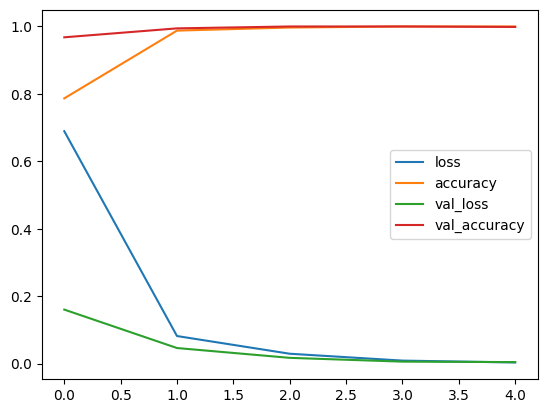

In [42]:
pd.DataFrame(history_1.history).plot()

In [48]:
y_pred_1 = model_1.predict(val_ds)

6/6 [==============================] - 1s 143ms/step


In [49]:
y_pred_1 .shape

(716, 7)

In [50]:
y_pred_1 = tf.argmax(y_pred_1 , axis=1)
y_true = np.argmax(valid_lab,axis=1)

In [51]:
y_true, y_pred_1

(array([4, 3, 6, 2, 1, 4, 1, 5, 3, 4, 5, 2, 3, 4, 4, 6, 6, 2, 4, 0, 3, 4,
        4, 3, 3, 1, 1, 2, 1, 1, 0, 4, 6, 0, 0, 5, 0, 5, 2, 1, 6, 3, 2, 4,
        6, 6, 4, 5, 3, 2, 1, 3, 1, 3, 4, 0, 6, 1, 4, 5, 3, 4, 6, 0, 5, 4,
        4, 1, 2, 5, 2, 4, 6, 3, 0, 0, 4, 4, 2, 2, 6, 6, 6, 0, 1, 5, 4, 3,
        3, 2, 0, 3, 0, 3, 4, 0, 5, 3, 2, 2, 5, 4, 4, 6, 4, 2, 2, 4, 0, 3,
        1, 0, 3, 3, 1, 1, 0, 3, 3, 4, 0, 6, 4, 0, 6, 3, 3, 2, 6, 1, 3, 0,
        4, 3, 4, 6, 1, 3, 1, 0, 5, 5, 1, 4, 5, 4, 3, 2, 6, 2, 2, 6, 3, 4,
        0, 0, 4, 0, 0, 0, 0, 4, 4, 5, 1, 5, 3, 4, 6, 0, 0, 3, 1, 5, 6, 6,
        4, 4, 3, 4, 2, 5, 5, 0, 0, 3, 5, 0, 3, 4, 6, 1, 6, 2, 6, 0, 0, 1,
        1, 2, 2, 5, 2, 6, 0, 4, 2, 2, 5, 4, 5, 4, 2, 5, 4, 3, 2, 3, 6, 4,
        3, 2, 1, 5, 4, 0, 5, 4, 1, 6, 2, 6, 0, 3, 0, 0, 4, 4, 1, 6, 2, 5,
        0, 2, 2, 0, 2, 5, 3, 4, 4, 5, 6, 0, 4, 6, 4, 5, 3, 0, 4, 0, 4, 4,
        3, 2, 6, 2, 0, 0, 1, 5, 3, 6, 6, 1, 1, 2, 0, 0, 1, 2, 3, 2, 5, 0,
        5, 1, 2, 6, 4, 5, 2, 4, 1, 6, 

In [53]:
len(y_pred_1), len(y_true)

(716, 716)

In [56]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_true, y_pred_1)
cm1

array([[ 98,   0,   0,   0,   0,   0,   0],
       [  0,  92,   0,   0,   0,   0,   0],
       [  0,   0,  99,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0],
       [  0,   0,   0,   0, 139,   0,   0],
       [  0,   0,   0,   0,   0,  90,   0],
       [  1,   0,   0,   0,   0,   0,  98]])

<Axes: >

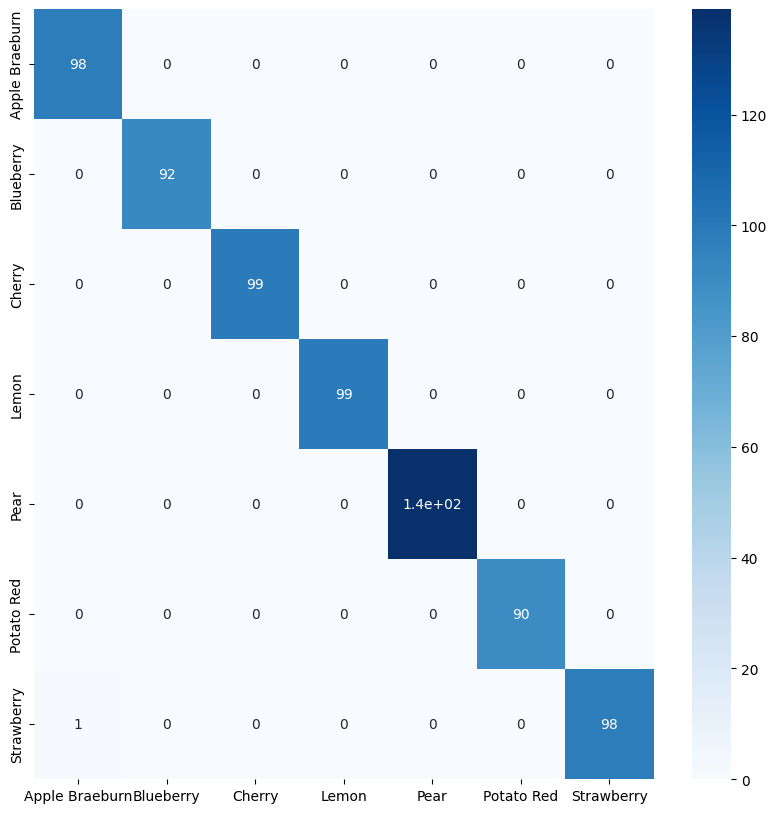

In [61]:
plt.figure(figsize = (10,10))
sns.heatmap(pd.DataFrame(cm1, index= class_names, columns = class_names), annot = True, cmap="Blues")

In [74]:
predictions = model_1.predict(test_ds)

14/14 [==============================] - 3s 182ms/step


In [75]:
predictions.shape

(1788, 7)

In [76]:
predictions = class_names[tf.argmax(predictions, axis=1)]
predictions[:5]

array(['Potato Red', 'Blueberry', 'Pear', 'Blueberry', 'Apple Braeburn'],
      dtype='<U14')

In [90]:
predictions.shape

(1788,)

In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
print("Precision:",precision_score(y_true, y_pred_1,average='micro'))

# Recall
print("Recall:",recall_score(y_true, y_pred_1,average='micro'))

# F1-Score
print("f1-score:",f1_score(y_true, y_pred_1,average='micro'))

Precision: 0.9986033519553073
Recall: 0.9986033519553073
f1-score: 0.9986033519553073


In [38]:
model_2.evaluate(val_ds)

6/6 [==============================] - 18s 3s/step - loss: 6.8521 - accuracy: 0.5628


[6.852103233337402, 0.5628491640090942]

<Axes: >

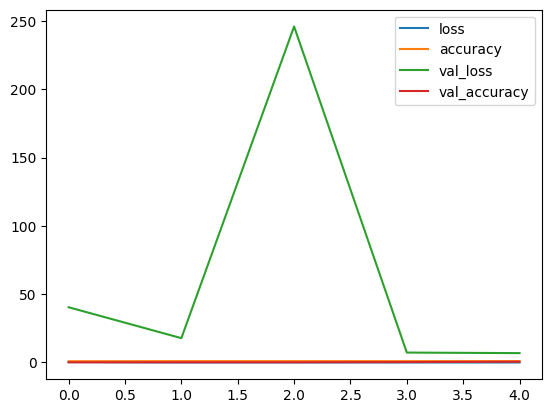

In [78]:
pd.DataFrame(history_2.history).plot()

In [79]:
y_pred_2 = model_2.predict(val_ds)

6/6 [==============================] - 13s 2s/step


In [80]:
y_pred_2.shape

(716, 7)

In [81]:
y_pred_2 = tf.argmax(y_pred_2 , axis=1)
y_true = np.argmax(valid_lab,axis=1)

In [82]:
y_true, y_pred_2

(array([4, 3, 6, 2, 1, 4, 1, 5, 3, 4, 5, 2, 3, 4, 4, 6, 6, 2, 4, 0, 3, 4,
        4, 3, 3, 1, 1, 2, 1, 1, 0, 4, 6, 0, 0, 5, 0, 5, 2, 1, 6, 3, 2, 4,
        6, 6, 4, 5, 3, 2, 1, 3, 1, 3, 4, 0, 6, 1, 4, 5, 3, 4, 6, 0, 5, 4,
        4, 1, 2, 5, 2, 4, 6, 3, 0, 0, 4, 4, 2, 2, 6, 6, 6, 0, 1, 5, 4, 3,
        3, 2, 0, 3, 0, 3, 4, 0, 5, 3, 2, 2, 5, 4, 4, 6, 4, 2, 2, 4, 0, 3,
        1, 0, 3, 3, 1, 1, 0, 3, 3, 4, 0, 6, 4, 0, 6, 3, 3, 2, 6, 1, 3, 0,
        4, 3, 4, 6, 1, 3, 1, 0, 5, 5, 1, 4, 5, 4, 3, 2, 6, 2, 2, 6, 3, 4,
        0, 0, 4, 0, 0, 0, 0, 4, 4, 5, 1, 5, 3, 4, 6, 0, 0, 3, 1, 5, 6, 6,
        4, 4, 3, 4, 2, 5, 5, 0, 0, 3, 5, 0, 3, 4, 6, 1, 6, 2, 6, 0, 0, 1,
        1, 2, 2, 5, 2, 6, 0, 4, 2, 2, 5, 4, 5, 4, 2, 5, 4, 3, 2, 3, 6, 4,
        3, 2, 1, 5, 4, 0, 5, 4, 1, 6, 2, 6, 0, 3, 0, 0, 4, 4, 1, 6, 2, 5,
        0, 2, 2, 0, 2, 5, 3, 4, 4, 5, 6, 0, 4, 6, 4, 5, 3, 0, 4, 0, 4, 4,
        3, 2, 6, 2, 0, 0, 1, 5, 3, 6, 6, 1, 1, 2, 0, 0, 1, 2, 3, 2, 5, 0,
        5, 1, 2, 6, 4, 5, 2, 4, 1, 6, 

In [83]:
len(y_pred_2), len(y_true)

(716, 716)

In [84]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_true, y_pred_2)
cm2

array([[97,  0,  0,  1,  0,  0,  0],
       [ 0, 13,  0,  0, 79,  0,  0],
       [24,  0, 75,  0,  0,  0,  0],
       [ 0,  0,  0, 99,  0,  0,  0],
       [ 0,  0,  0, 38, 93,  8,  0],
       [ 0,  0,  0,  0, 88,  2,  0],
       [36,  0,  1,  0, 38,  0, 24]])

<Axes: >

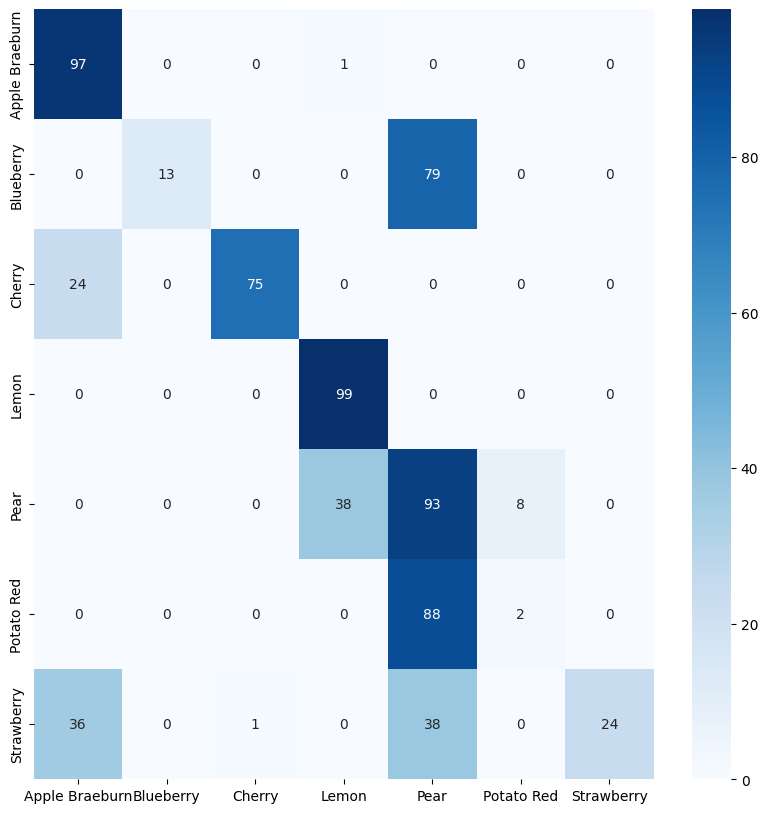

In [85]:
plt.figure(figsize = (10,10))
sns.heatmap(pd.DataFrame(cm2, index= class_names, columns = class_names), annot = True, cmap="Blues")

In [86]:
predictions_2 = model_2.predict(test_ds)

14/14 [==============================] - 29s 2s/step


In [87]:
predictions_2.shape

(1788, 7)

In [88]:
predictions_2 = class_names[tf.argmax(predictions_2, axis=1)]
predictions[:5]

array(['Potato Red', 'Blueberry', 'Pear', 'Blueberry', 'Apple Braeburn'],
      dtype='<U14')

In [89]:
predictions_2.shape

(1788,)

In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
print("Precision:",precision_score(y_true, y_pred_2,average='micro'))

# Recall
print("Recall:",recall_score(y_true, y_pred_2,average='micro'))

# F1-Score
print("f1-score:",f1_score(y_true, y_pred_2,average='micro'))

Precision: 0.5628491620111732
Recall: 0.5628491620111732
f1-score: 0.5628491620111732


In [221]:
import pickle

model_1 = "fruits_model.pickle"

pickle.dump(model_1, open(model_1 , "wb"))

In [222]:
loaded_model = pickle.load(open(model_1 , "rb"))

## ทดสอบใช้งานโมเดล (Deploy Model)  

In [213]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

testpath = '/content/drive/MyDrive/Fruits-dataset/test/test/'
testImg = [os.path.join(testpath, f) for f in os.listdir(testpath) if os.path.isdir(os.path.join(testpath, f))]

for imagePath in testImg:
    for item in os.listdir(imagePath):
        file = os.path.join(imagePath, item)
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (100, 100))

            img = img.astype('float32') / 255
            img = np.reshape(img, (1, 100, 100, 3))

            predict = model_1.predict(img)
            label = ['Pear', 'Cherry']
            result = label[np.argmax(predict)]

            plt.title(result)
            plt.imshow(img.reshape(100, 100, 3))
            plt.show()